# More Examples

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/beginnerSC/pyminimax/master?urlpath=/lab/tree/docs/source/more_examples.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/beginnerSC/pyminimax/blob/master/docs/source/more_examples.ipynb)

This page is generated by a Jupyter notebook which can be opened and run in Binder or Google Colab by clicking on the above badges. **To run it in Google Colab, you need to install PyMinimax in Colab first:**

In [ ]:
pip install pyminimax

## Random Points in 2D

In this example we run the minimax linkage clustering on a toy dataset of 20 random points in 2D: 

In [1]:
import numpy as np
from pandas import DataFrame

np.random.seed(0)
X = np.random.rand(20, 2)

DataFrame(X, columns=['x', 'y'])

,x,y
0,0.548814,0.715189
1,0.602763,0.544883
2,0.423655,0.645894
3,0.437587,0.891773
4,0.963663,0.383442
5,0.791725,0.528895
6,0.568045,0.925597
7,0.071036,0.087129
8,0.020218,0.832620
9,0.778157,0.870012


Below is the dendrogram. 

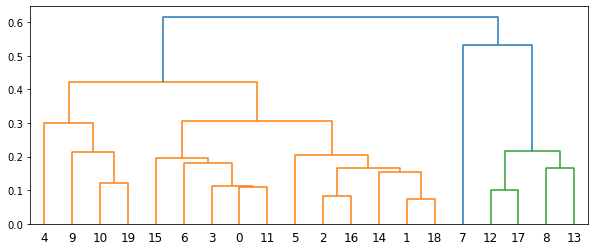

In [2]:
import matplotlib.pyplot as plt
from pyminimax import minimax
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram

Z = minimax(pdist(X), return_prototype=True)

plt.figure(figsize=(10, 4))
dendrogram(Z[:, :4])
plt.show()

A unique advantage of the minimax linkage hierarchical clustering is that every cluster has a prototype selected from the original data. This is a representative data point of the cluster. 

The threshold used to cut the dendrogram is also interpretable. Suppose the dendrogram is cut at threshold $t$, splitting the data into clusters $G_1, G_2, \ldots$ with corresponding prototypes $p_1, p_2, \ldots$. 
Then, for any $i$, all data points in $G_i$ must be in the circle centered at $p_i$ with radius $t$. That is, the distance between a data point and the prototype of the cluster it belongs to must be less than or equal to $t$. 

Here we draw the clusters and the circles. The data points at the center of the circles are the prototypes. 

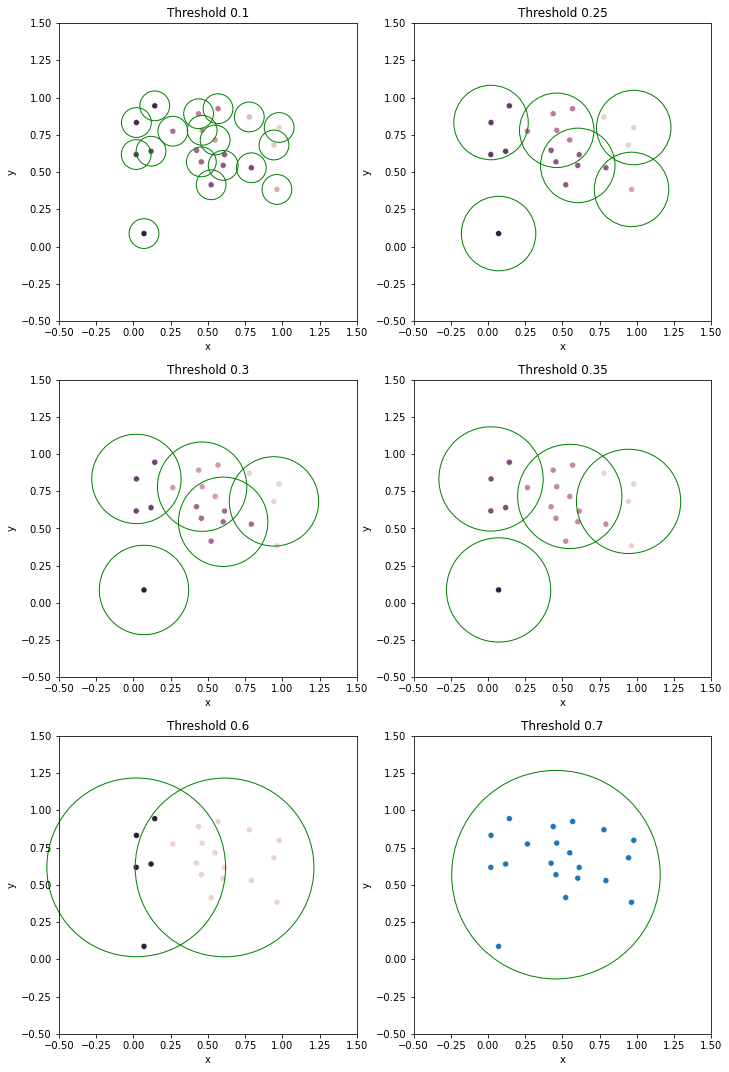

In [3]:
import seaborn as sns
from pandas import DataFrame
from pyminimax import fcluster_prototype

cuts = [0.1, 0.25, 0.3, 0.35, 0.6, 0.7]

fig, axs = plt.subplots(3, 2, figsize=(10, 15))

for ax, cut in zip(axs.ravel(), cuts):
    clust_proto = fcluster_prototype(Z, t=cut, criterion='distance')    
    
    df = DataFrame(np.concatenate([X, clust_proto], axis=1), columns=['x', 'y', 'clust', 'proto'])    
    sns.scatterplot(data=df, x='x', y='y', hue='clust', legend=None, ax=ax)
    
    ax.set(xlim=(-0.5, 1.5), ylim=(-0.5, 1.5), aspect=1, title=f'Threshold {cut}')
    protos = np.unique(df['proto'].map(int).values)
    for proto in protos:
        circle = plt.Circle(X[proto], cut, edgecolor='g', facecolor='none', clip_on=False)
        ax.add_patch(circle)
        
fig.tight_layout()
plt.show()

## Hand-Written Digits

In this example we run the minimax linkage clustering on images of hand-written digits 1, 4 and 7. The data we use is a subset of the scikit-learn hand-written digit images data. The below code from [its documentation](https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html) prints the first few of them. 

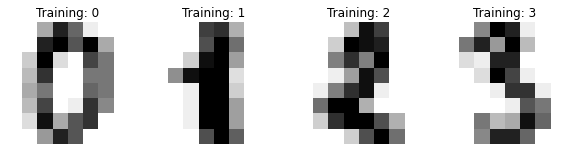

In [4]:
import matplotlib.pyplot as plt
from sklearn import datasets

digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

First we load the data in a pandas DataFrame, and filter out images that are not 1, 4 or 7. The resulting DataFrame has 542 rows, each having 65 values. The first 64 are a flattened $8\times 8$ matrix representing the image, and the last value in the target column indicates this image is a 1, 4 or 7. 

In [5]:
digits = datasets.load_digits(as_frame=True)['frame']
digits147 = digits[digits['target'].isin([1, 4, 7])]
digits147

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
7,0.0,0.0,7.0,8.0,13.0,16.0,15.0,1.0,0.0,0.0,...,0.0,0.0,0.0,13.0,5.0,0.0,0.0,0.0,0.0,7
11,0.0,0.0,0.0,0.0,14.0,13.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,13.0,16.0,1.0,0.0,1
14,0.0,0.0,0.0,8.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.0,15.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1778,0.0,0.0,0.0,1.0,13.0,8.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,15.0,7.0,0.0,0.0,4
1779,0.0,0.0,3.0,10.0,16.0,16.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,12.0,0.0,0.0,0.0,0.0,7
1785,0.0,1.0,10.0,16.0,15.0,2.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,10.0,15.0,2.0,0.0,0.0,0.0,7
1788,0.0,0.0,0.0,1.0,12.0,6.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,14.0,9.0,0.0,0.0,4


For example, the first 64 values of the first row is the below matrix flattened. This is a matrix of gray values representing an image of 1. 

In [6]:
digits147.iloc[0].values[:-1].reshape(8, 8)

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

We drop the target column, compute the (extended) linkage matrix and draw the dendrogram. 

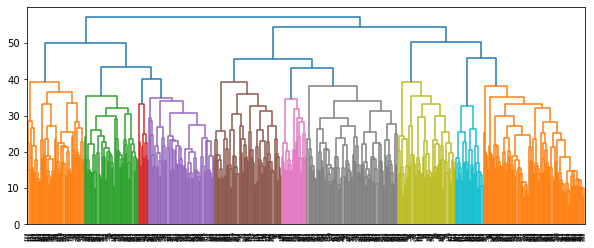

In [7]:
from pyminimax import minimax
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram

X = digits147.drop('target', axis=1).values
Z = minimax(pdist(X), return_prototype=True)

plt.figure(figsize=(10, 4))
dendrogram(Z[:, :4])
plt.show()

The 3rd column of the extended linkage matrix is the distance between the two clusters to be merged. The 3rd last merge has distance 50.3388, indicating that if the dendrogram is cut at a threshold slightly above 50.3388, there will be 3 clusters. 

In [8]:
from pandas import DataFrame

DataFrame(Z[-3:, :], columns=['x', 'y', 'distance', 'n_pts', 'prototype'])

,x,y,distance,n_pts,prototype
0,1072.0,1078.0,50.338852,182.0,135.0
1,1077.0,1080.0,54.488531,360.0,137.0
2,1079.0,1081.0,57.122675,542.0,22.0


The cluster and prototypes can be computed by `pyminimax.fcluster_prototype`. The results are put together with the target column of the original data. 

In [9]:
from pyminimax import fcluster_prototype

clust, proto = fcluster_prototype(Z, t=52, criterion='distance').T

res = digits147.assign(clust=clust, proto=proto)
df = res[['target', 'clust', 'proto']].sort_values(by='target')
df

,target,clust,proto
1,1,3,135
517,1,3,135
527,1,3,135
537,1,3,135
1264,1,3,135
...,...,...,...
1381,7,1,341
429,7,1,341
1046,7,1,341
472,7,1,341


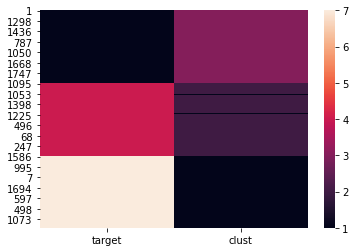

In [10]:
import seaborn as sns

sns.heatmap(df[['target', 'clust']]);

In [11]:
import numpy as np

protos = np.unique(df['proto'])
protos

array([135, 341, 464], dtype=int32)

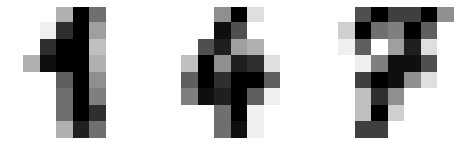

In [12]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(8, 3))

for ax, proto in zip(axs, protos[[0, 2, 1]]):
    ax.set_axis_off()
    image = digits147.drop('target', axis=1).iloc[proto].values.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')